# Merge and read csv_files

In [1]:
import pandas as pd
import glob
import os

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Keep only rows where Experiment == "SR"
df = df[df["Experiment"] == "SR_finger_tapping"]

# Show the combined DataFrame
print(df.head())

      Name         Experiment  Trial                       Sequence  \
100  julie  SR_finger_tapping      1  p z o q s m r k t h c e f b i   
101  julie  SR_finger_tapping      2  f d o i e j r k z b u s l h g   
102  julie  SR_finger_tapping      3  m x j o r e p v y z k f g a l   
103  julie  SR_finger_tapping      4  o z k i h r v j t q c a m u s   
104  julie  SR_finger_tapping      5  y e r z v t o m b f q p n x g   

              Recall  
100        p z g o s  
101  f d o i e j k r  
102      m x j o r e  
103  o x h i j k r s  
104      y e r z v t  


In [2]:
df["points"] = 0   # initialize column
df["fails"] = [[] for _ in range(len(df))]  # initialize fails as empty lists

for idx, row in df.iterrows():
    seq = row["Sequence"].split()
    rec = row["Recall"].split()
    
    points = 0
    fails = []
    mistake_found = False
    
    for s, r in zip(seq, rec):
        if not mistake_found and s == r:
            points += 1
        elif s != r:
            fails.append((s, r))
            mistake_found = True  # lock the points counter
    
    # save results back into df
    df.at[idx, "points"] = points
    df.at[idx, "fails"] = fails

df.head(10)

,Name,Experiment,Trial,Sequence,Recall,points,fails
100,julie,SR_finger_tapping,1,p z o q s m r k t h c e f b i,p z g o s,2,"[(o, g), (q, o)]"
101,julie,SR_finger_tapping,2,f d o i e j r k z b u s l h g,f d o i e j k r,6,"[(r, k), (k, r)]"
102,julie,SR_finger_tapping,3,m x j o r e p v y z k f g a l,m x j o r e,6,[]
103,julie,SR_finger_tapping,4,o z k i h r v j t q c a m u s,o x h i j k r s,1,"[(z, x), (k, h), (h, j), (r, k), (v, r), (j, s)]"
104,julie,SR_finger_tapping,5,y e r z v t o m b f q p n x g,y e r z v t,6,[]
105,julie,SR_finger_tapping,6,n h d g a o m c u t l z s r e,n h d g a o m c u,9,[]
106,julie,SR_finger_tapping,7,a g b s k t o f j u x m p z v,a g b s k t,6,[]
107,julie,SR_finger_tapping,8,x q o z m i v l b p s f a e j,x q u o y z,2,"[(o, u), (z, o), (m, y), (i, z)]"
108,julie,SR_finger_tapping,9,n i e m z g h u s x q y p o d,n i e m z g h u,8,[]
109,julie,SR_finger_tapping,10,i j k m h a t x n g o f c v q,i j h m o,2,"[(k, h), (h, o)]"


# Confusion matrix

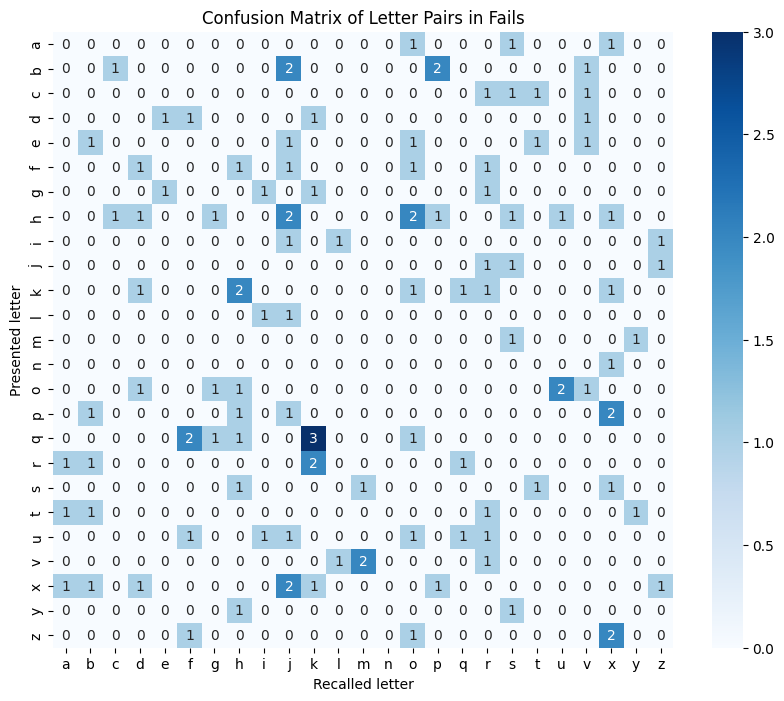

In [3]:
from collections import Counter
import seaborn as sns

import matplotlib.pyplot as plt

# Flatten all (s, r) pairs in fails column
all_fails = [pair for sublist in df["fails"] for pair in sublist]

# Count occurrences of each (s, r) pair
fail_counts = Counter(all_fails)

# Get sorted unique letters for axis labels
letters = sorted(set([s for s, _ in all_fails] + [r for _, r in all_fails]))

# Create confusion matrix DataFrame
conf_matrix = pd.DataFrame(0, index=letters, columns=letters)
for (s, r), count in fail_counts.items():
    conf_matrix.loc[s, r] = count

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Recalled letter")
plt.ylabel("Presented letter")
plt.title("Confusion Matrix of Letter Pairs in Fails")
plt.show()